## **Exploring the Relationship Between Body Fat Percentage and Key Parameters: A Regression Analysis**

## **Introduction and Background**

**Introduction**

In today's health-conscious society, maintaining an optimal body composition is a goal shared by many individuals. Understanding the factors that contribute to body fat percentage (BFP) can provide valuable insights into health and fitness management. This paper aims to investigate the relationship between BFP and several key parameters, such as height, weight, blood pressure, gender, age, and activity intensity for workouts. By utilizing regression analysis, we seek to identify and quantify the impact of these variables on body fat percentage.

**Background**

Body fat percentage is a significant indicator of an individual's overall health and fitness level. It is the proportion of total body weight that consists of fat mass. Higher body fat percentages are often associated with an increased risk of various health issues, including cardiovascular diseases, diabetes, and certain types of cancer.
While it is well-established that body fat percentage is influenced by multiple factors, such as genetics, lifestyle, and diet, understanding the relative importance of these factors remains a complex challenge. By employing regression analysis, we can systematically examine the relationship between BFP and key parameters, thus shedding light on their respective contributions to body composition.

**The Case and Problem Statement**

The primary objective of this study is to investigate the relationship between body fat percentage and the following parameters: height, weight, blood pressure, gender, age, and activity intensity for workouts. We aim to determine the extent to which each of these variables influences body fat percentage, thereby identifying the most significant factors.

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap, BoundaryNorm

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [ ]:
#Import and read data
path = "bodyPerformance.csv"
df = pd.read_csv(path)

In [ ]:
#Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
#Overview the data
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


The dataset used in this study was obtained from the Korea Sports Promotion Foundation and consists of performance grades, age, and exercise performance data. The data includes information related to age, gender, height, weight, body fat percentage, diastolic blood pressure, systolic blood pressure, grip force, and sit-up counts. These variables were selected based on their potential influence on body fat percentage and fitness performance.

## **Data Pre-Processing**

In [ ]:
#Feature selection
df = df.loc[:,[
            "age",
            "gender",
            "height_cm",
            "weight_kg",
            "diastolic",
            "systolic",
            "sit-ups counts",
            "gripForce",
            "body fat_%"
            ]]
df.head()

,age,gender,height_cm,weight_kg,diastolic,systolic,sit-ups counts,gripForce,body fat_%
0,27.0,M,172.3,75.24,80.0,130.0,60.0,54.9,21.3
1,25.0,M,165.0,55.80,77.0,126.0,53.0,36.4,15.7
2,31.0,M,179.6,78.00,92.0,152.0,49.0,44.8,20.1
3,32.0,M,174.5,71.10,76.0,147.0,53.0,41.4,18.4
4,28.0,M,173.8,67.70,70.0,127.0,45.0,43.5,17.1


In [ ]:
#Renaming the columns for better recalling
df = df.rename(columns={"height_cm" : "height",
                          "weight_kg" : "weight",
                          "diastolic": "lowblood",
                          "systolic" : "highblood",
                          "sit-ups counts" :"situp",
                          "body fat_%" : "bodyfat",
                         "gripForce" : "gripforce",
                          })
df.head()

,age,gender,height,weight,lowblood,highblood,situp,gripforce,bodyfat
0,27.0,M,172.3,75.24,80.0,130.0,60.0,54.9,21.3
1,25.0,M,165.0,55.80,77.0,126.0,53.0,36.4,15.7
2,31.0,M,179.6,78.00,92.0,152.0,49.0,44.8,20.1
3,32.0,M,174.5,71.10,76.0,147.0,53.0,41.4,18.4
4,28.0,M,173.8,67.70,70.0,127.0,45.0,43.5,17.1


In [ ]:
#Create function to check unique data
def CheckUnique():
   print('age : ', df['age'].unique())
   print('gender : ', df['gender'].unique())
   print('height :', df['height'].unique())
   print('weight :', df['weight'].unique())
   print('lowblood :', df['lowblood'].unique())
   print('highblood :', df['highblood'].unique())
   print('situp :', df['situp'].unique())
   print('gripforce :', df['gripforce'].unique())
   print('bodyfat :', df['bodyfat'].unique())


In [ ]:
# Calling the CheckUnique function
CheckUnique()

age :  [27. 25. 31. 32. 28. 36. 42. 33. 54. 57. 22. 24. 45. 26. 21. 59. 38. 44.
 23. 62. 47. 48. 50. 30. 49. 40. 52. 39. 34. 58. 43. 56. 37. 63. 35. 60.
 51. 41. 46. 29. 61. 55. 64. 53.]
gender :  ['M' 'F']
height : [172.3 165.  179.6 174.5 173.8 165.4 164.5 174.9 166.8 185.  169.2 153.
 156.  175.7 181.  159.  164.2 179.9 162.7 161.7 155.9 166.7 170.  164.1
 169.  158.3 175.8 176.  159.8 170.9 176.7 159.5 172.1 151.5 177.6 172.5
 177.5 178.  168.  173.6 173.3 159.6 161.8 169.9 183.6 180.1 169.8 157.2
 168.3 164.4 146.5 174.1 185.4 168.9 175.3 164.  162.4 166.6 174.2 150.5
 160.2 179.  172.7 171.5 175.1 172.2 171.9 174.  158.1 170.4 158.6 168.5
 156.3 157.  161.3 177.  171.  178.4 156.7 178.5 171.2 176.4 175.4 158.4
 173.  159.1 180.5 162.2 168.8 170.3 172.8 163.6 166.2 179.2 177.8 184.7
 173.2 164.3 169.1 183.5 156.9 178.2 177.9 184.8 164.7 178.3 160.1 167.7
 165.1 160.3 153.2 169.5 180.2 180.3 167.9 165.6 184.1 166.9 175.  171.6
 178.1 170.1 154.9 160.9 173.5 163.  155.5 163.9 163.7 

#### Checking Missing Values and Duplicates

In [ ]:
#Checking missing values

print("Number of missing values:")
df.isna().sum()

Number of missing values:


age          0
gender       0
height       0
weight       0
lowblood     0
highblood    0
situp        0
gripforce    0
bodyfat      0
dtype: int64

In [ ]:
#Checking duplicates
df.duplicated().sum()

1

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
#Reviewing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13392 non-null  float64
 1   gender     13392 non-null  object 
 2   height     13392 non-null  float64
 3   weight     13392 non-null  float64
 4   lowblood   13392 non-null  float64
 5   highblood  13392 non-null  float64
 6   situp      13392 non-null  float64
 7   gripforce  13392 non-null  float64
 8   bodyfat    13392 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


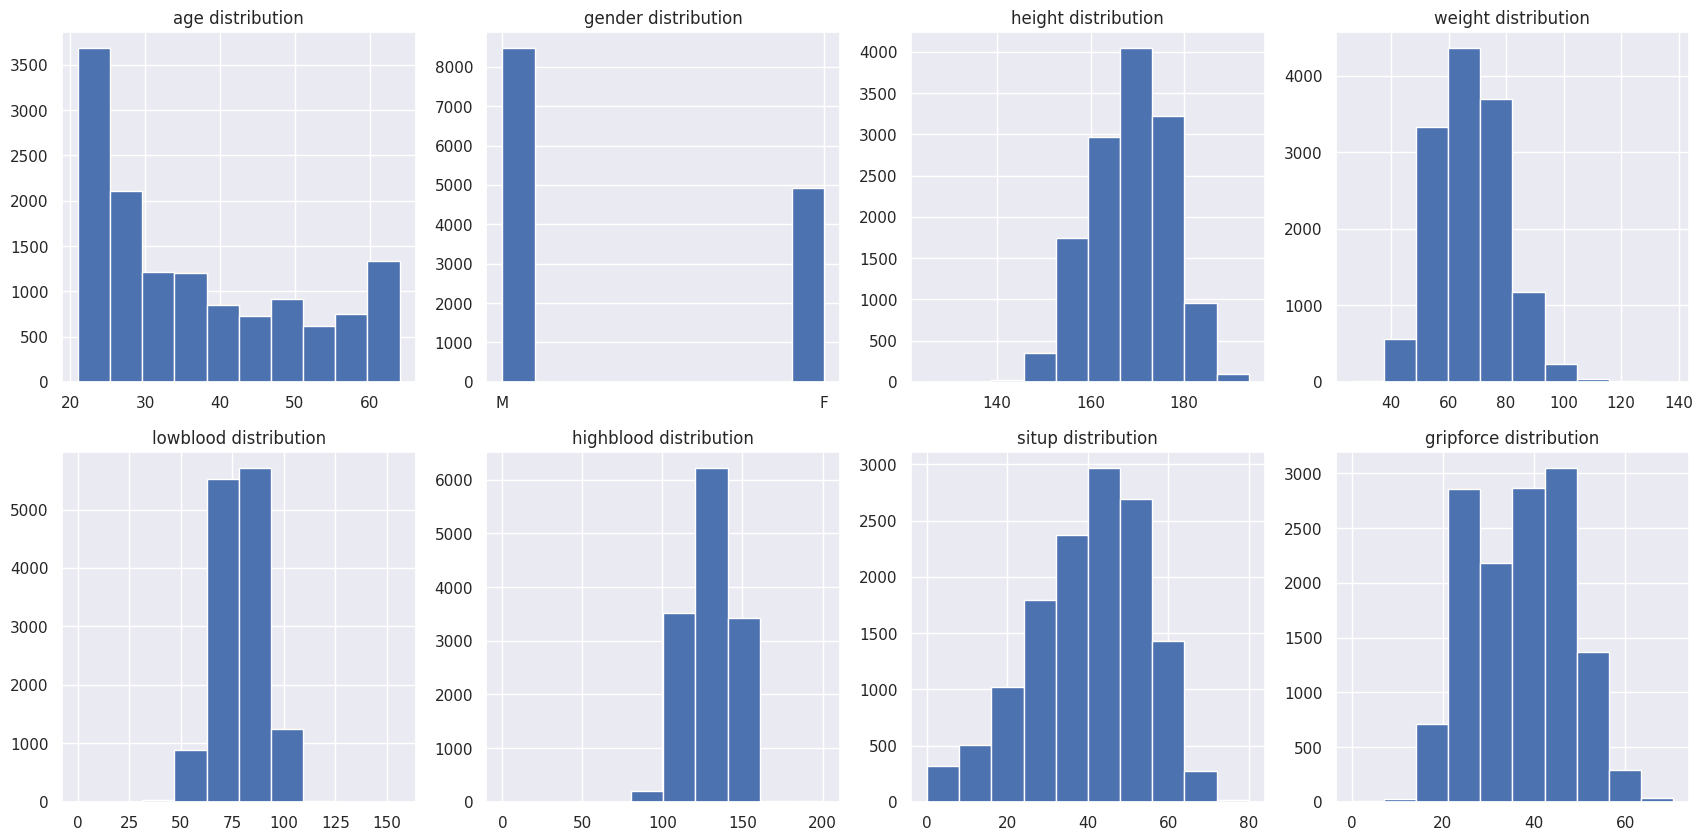

In [ ]:
# Displaying data distributions
columns_ = ["age", "gender", "height", "weight", "lowblood", "highblood", "situp", "gripforce"]
index_ = 0
fig, ax = plt.subplots(2,4, figsize = (21,10))
for row in range(2):
    for col in range(4):
        ax[row,col].hist(df[columns_[index_]])
        ax[row,col].set_title(f"{columns_[index_]} distribution")
        index_ += 1
plt.show()


## **Exploratory Data Analysis**

#### 1. Bodyfat based on gender

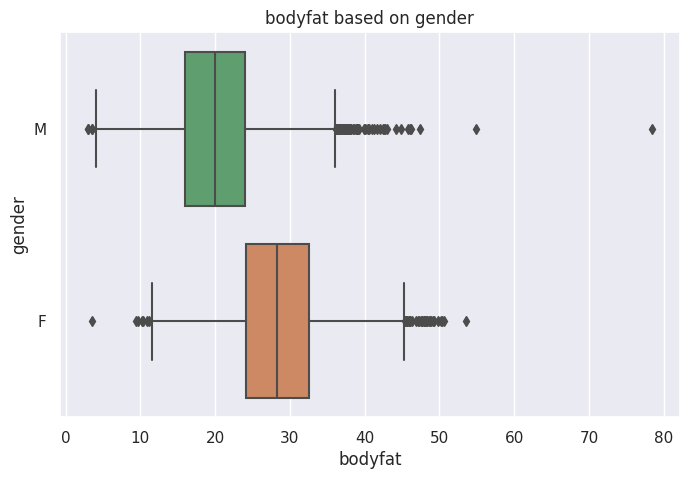

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "bodyfat", y = "gender", data = df, ax = ax, palette = my_palette1)
ax.set_title("bodyfat based on gender")
plt.show()

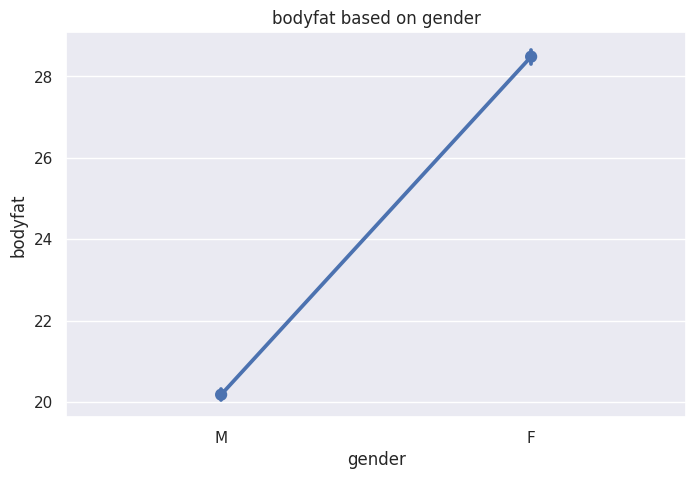

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "bodyfat", x = "gender", data = df, ax = ax)
ax.set_title("bodyfat based on gender")
plt.show()

The exploratory data analysis revealed a noticeable difference in body fat percentage based on gender. The point plot analysis depicted that the average body fat percentage for males was approximately 20%, while females exhibited a higher average body fat percentage of around 28%. This disparity suggests that gender is a significant factor influencing body fat levels, with females tending to have a relatively higher proportion of body fat compared to males. Further investigation into the underlying reasons for this divergence can provide valuable insights into the physiological and hormonal variations between genders and their impact on body composition.

#### 2. Bodyfat based on age

In [ ]:
def categorize_age(age):
    if age < 30:
        return 'young'
    elif age > 50:
        return 'old'
    else:
        return 'middle'

In [ ]:
df['age_category'] = df['age'].apply(categorize_age)

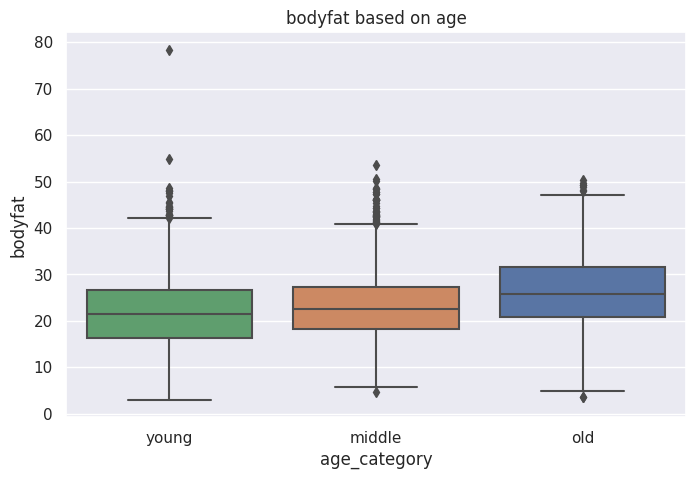

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "age_category", y = "bodyfat", data = df, ax = ax, palette = my_palette1)
ax.set_title("bodyfat based on age")
plt.show()

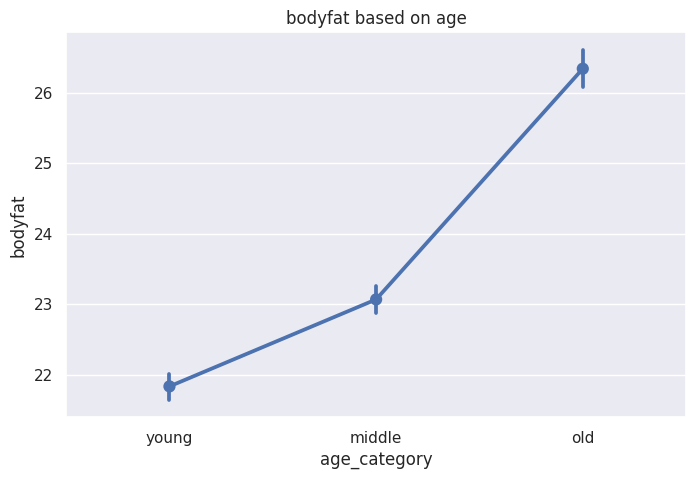

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "bodyfat", x = "age_category", data = df, ax = ax)
ax.set_title("bodyfat based on age")
plt.show()


The exploratory data analysis also revealed interesting patterns in body fat percentage based on age groups. According to the point plot analysis, individuals below the age of 30 had an average body fat percentage of approximately 22%. In the middle age range (30-50), the average body fat percentage was slightly higher at around 23%. However, in the older age group (above 50), the average body fat percentage increased further to approximately 26%. These findings suggest a gradual increase in body fat percentage as individuals progress from younger to middle and older age categories. Understanding the relationship between age and body fat can provide insights into age-related changes in metabolism, hormonal profiles, and lifestyle factors that may contribute to alterations in body composition throughout the lifespan.

#### 3. Bodyfat based on gripforce

In [ ]:
average_gripforce = df['gripforce'].mean()

def categorize_gripforce(value):
    if value < average_gripforce:
        return 'low'
    else:
        return 'high'

In [ ]:
df['gripforce_category'] = df['gripforce'].apply(categorize_gripforce)

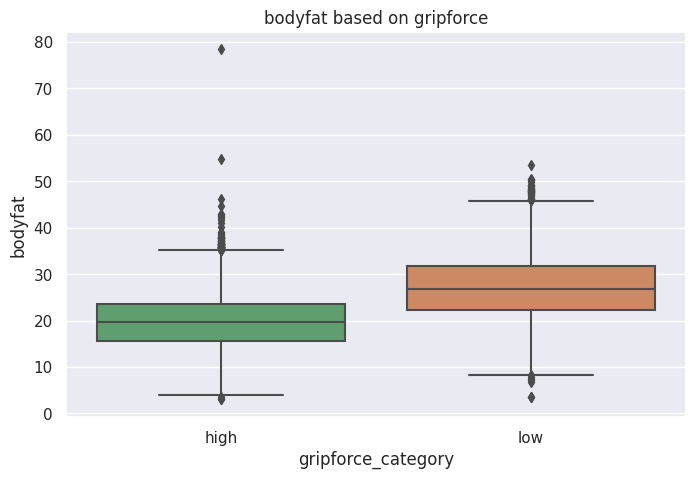

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "gripforce_category", y = "bodyfat", data = df, ax = ax, palette = my_palette1)
ax.set_title("bodyfat based on gripforce")
plt.show()

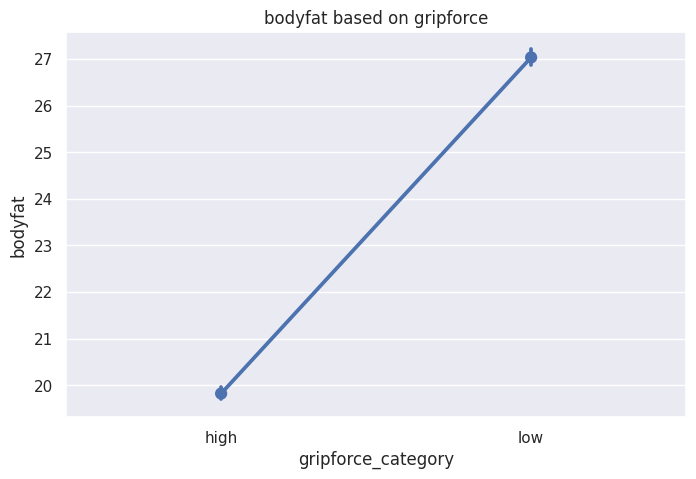

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "bodyfat", x = "gripforce_category", data = df, ax = ax)
ax.set_title("bodyfat based on gripforce")
plt.show()

The exploratory data analysis also examined the relationship between grip force and body fat percentage. The point plot analysis indicated that individuals with low grip force, falling below the average, had an average body fat percentage of approximately 27%. On the other hand, those with high grip force, surpassing the average, exhibited a significantly lower average body fat percentage of around 20%. This finding suggests that grip force, which serves as a proxy for upper body strength and overall muscular fitness, may be inversely related to body fat percentage. Individuals with higher grip force levels tend to have a lower proportion of body fat compared to those with lower grip force levels. This association emphasizes the importance of muscular strength and fitness in maintaining a healthy body composition. Further investigation into the mechanisms underlying this relationship can provide insights into the potential influence of muscle mass and metabolic factors on body fat percentage.

#### 4. Bodyfat based on lowblood

In [ ]:
average_lowblood = df['lowblood'].mean()

def categorize_lowblood(value):
    if value < average_lowblood:
        return 'low'
    else:
        return 'high'

In [ ]:
df['lowblood_category'] = df['lowblood'].apply(categorize_lowblood)

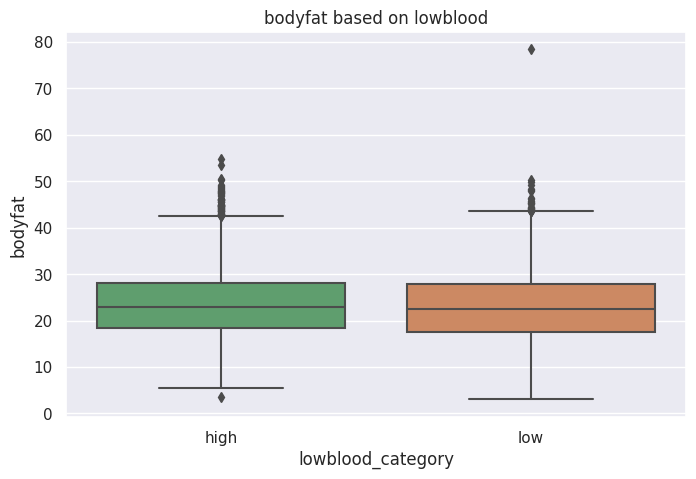

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "lowblood_category", y = "bodyfat", data = df, ax = ax, palette = my_palette1)
ax.set_title("bodyfat based on lowblood")
plt.show()

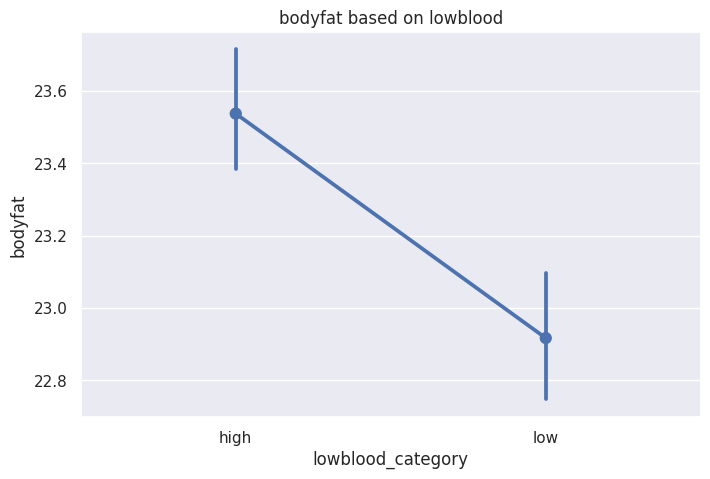

In [ ]:
# Code used to see distribution of BMI level based on family history of overweight category using point plot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "bodyfat", x = "lowblood_category", data = df, ax = ax)
ax.set_title("bodyfat based on lowblood")
plt.show()


During the exploratory data analysis, we examined the relationship between body fat percentage and low blood pressure levels. The point plot analysis indicated that individuals with low blood pressure had an average body fat percentage of approximately 22.9%. On the other hand, individuals with high low blood pressure exhibited a slightly higher average body fat percentage of around 23.5%. While the difference in body fat percentage between the two groups is relatively small, these findings suggest a minimal association between low blood pressure levels and body fat percentage. Further investigation is warranted to explore the potential underlying mechanisms and potential confounding factors that may influence this relationship.

#### 5. Bodyfat based on highblood

In [ ]:
average_highblood = df['highblood'].mean()

def categorize_highblood(value):
    if value < average_highblood:
        return 'low'
    else:
        return 'high'

In [ ]:
df['highblood_category'] = df['highblood'].apply(categorize_highblood)

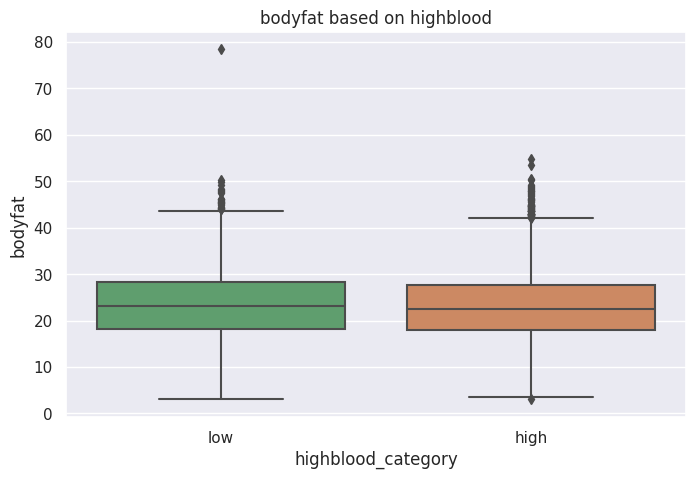

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "highblood_category", y = "bodyfat", data = df, ax = ax, palette = my_palette1)
ax.set_title("bodyfat based on highblood")
plt.show()

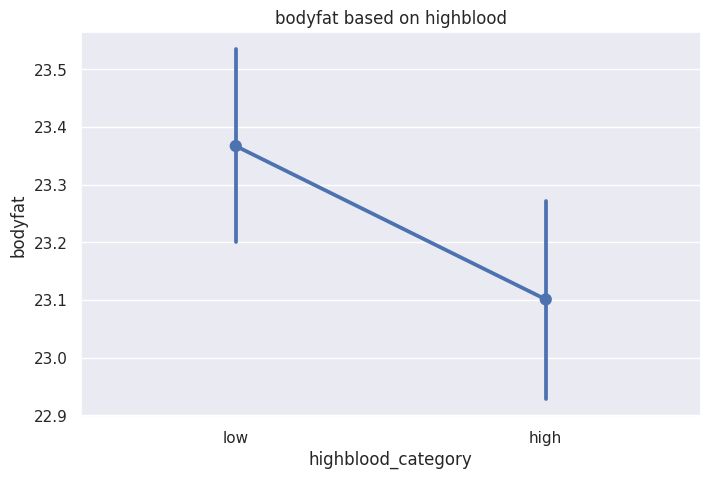

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "bodyfat", x = "highblood_category", data = df, ax = ax)
ax.set_title("bodyfat based on highblood")
plt.show()

In the exploratory data analysis, we investigated the relationship between body fat percentage and high blood pressure levels. The point plot analysis revealed that individuals with low high blood pressure had an average body fat percentage of approximately 23.3%. Conversely, individuals with high high blood pressure displayed a slightly lower average body fat percentage of around 23.1%. The difference in body fat percentage between the two groups is minimal, suggesting a weak association between high blood pressure levels and body fat percentage. Further research is necessary to elucidate the potential underlying factors and consider potential confounders that may influence this relationship between high blood pressure and body fat percentage.

#### **Interaction**

#### 1. Interaction between Gender and Age

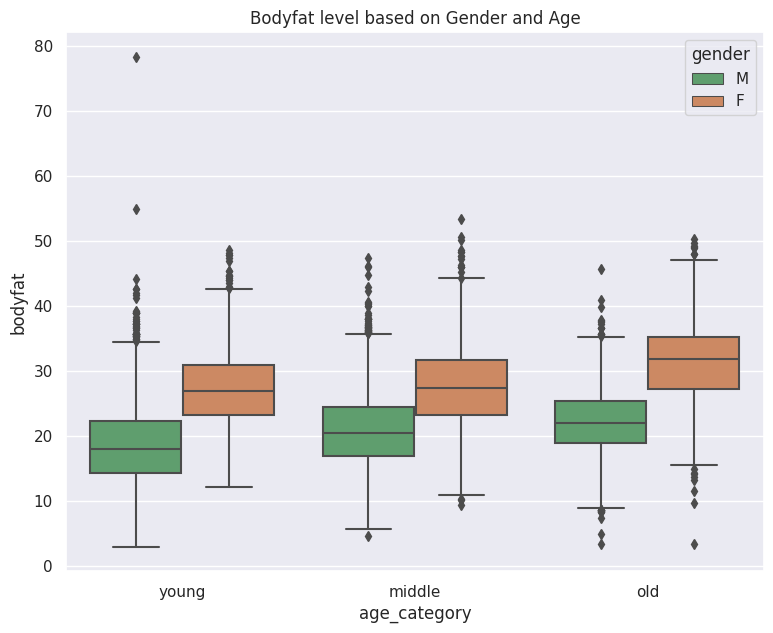

In [ ]:
fig, ax = plt.subplots(figsize = (9,7))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(y = "bodyfat", x = "age_category", hue = 'gender', data = df, ax = ax, palette = my_palette1)
ax.set_title("Bodyfat level based on Gender and Age")
plt.show()

#### 2. Interaction between Gender and Gripforce

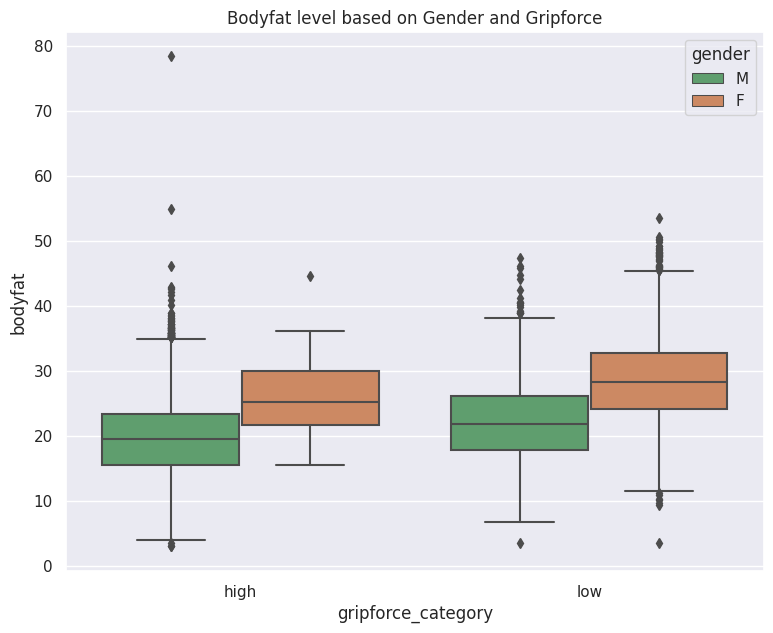

In [ ]:
fig, ax = plt.subplots(figsize = (9,7))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(y = "bodyfat", x = "gripforce_category", hue = 'gender', data = df, ax = ax, palette = my_palette1)
ax.set_title("Bodyfat level based on Gender and Gripforce")
plt.show()

#### 3. Interaction between Age and Gripforce

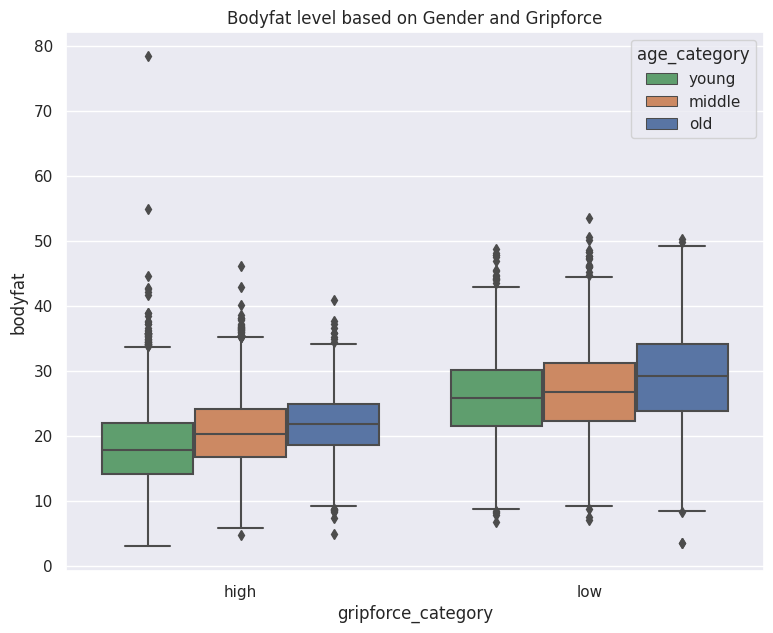

In [ ]:
fig, ax = plt.subplots(figsize = (9,7))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(y = "bodyfat", x = "gripforce_category", hue = 'age_category', data = df, ax = ax, palette = my_palette1)
ax.set_title("Bodyfat level based on Gender and Gripforce")
plt.show()

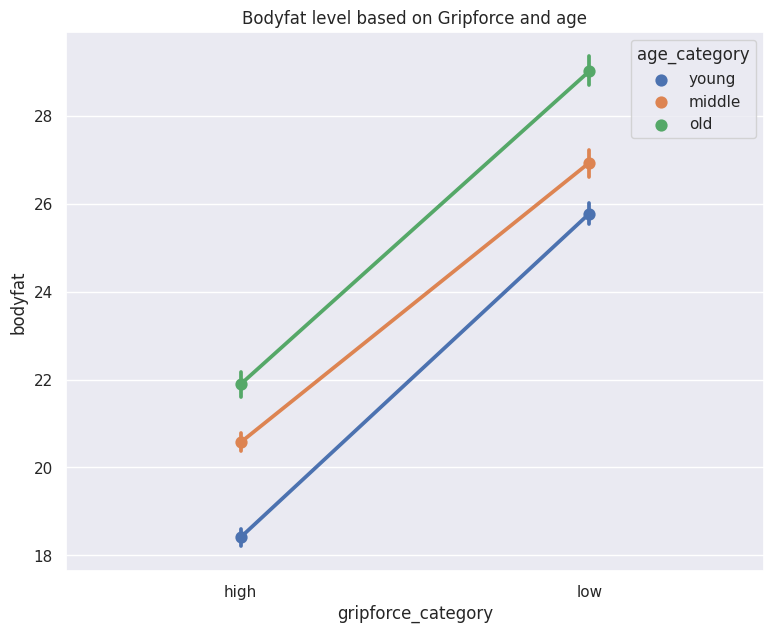

In [ ]:
fig, ax = plt.subplots(figsize = (9,7))
sns.pointplot(x = "gripforce_category", y ='bodyfat', hue = "age_category", data = df, ax = ax)
ax.set_title("Bodyfat level based on Gripforce and age")
plt.show()

## **Statistical Test**

In [ ]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

#### 1. T-test for the difference between two population means: Gender Category

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Female bodyfat level is less than or equal to male bodyfat.
$$ H_0:\mu_A ≤ \mu_B $$

$H_1$: Female bodyfat level is more than or equal to male bodyfat.
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [ ]:
#Determining whether the data has equal or unequal variances


male = df.loc[df["gender"] == "M"][["bodyfat"]].values
female = df.loc[df["gender"] == "F"][["bodyfat"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(male)/np.var(female)
ratio

0.9144416195203704

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.

In [ ]:
#Performing T-Test
result = ttest_ind(female, male, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.


print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [76.4758975]
P value = [0.]
--------------------------------------------------
Conclusion:
Reject the null hypothesis


To determine if there is a significant difference in body fat levels between males and females, a t-test for the difference between two population means was conducted. The null hypothesis (H0) stated that female body fat levels are less than or equal to male body fat levels, while the alternative hypothesis (H1) posited that female body fat levels are more than or equal to male body fat levels. The significance level was set at 0.05.

The statistical analysis resulted in a test statistic value of 76.4758975 and a p-value of 0. Based on these results, we can conclude that the null hypothesis should be rejected. The p-value, which is less than the significance level, indicates that there is strong evidence to suggest that female body fat levels are, on average, higher than male body fat levels. This analysis provides statistical support for the observation made in the exploratory data analysis, which revealed a significant difference in body fat percentages based on gender.


#### 2. T-test for the difference between two population means: Gripforce

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Strong or Weak Gripforce Bodyfat level are equal.
$$ H_0:\mu_A = \mu_B $$

$H_1$: Strong or Weak Gripforce Bodyfat level are not equal.
$$ H_1:\mu_A 	≠ \mu_B $$

Significance level = 0.05

In [ ]:
#Determining whether the data has equal or unequal variances

#Accessing column BMI data based on condition in gender column then save it as male variable
griphigh= df.loc[df["gripforce_category"] == "high"][["bodyfat"]].values
griplow = df.loc[df["gripforce_category"] == "low"][["bodyfat"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(griphigh)/np.var(griplow)
ratio

0.7196026977481312

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.

In [ ]:
#Performing T-Test
result = ttest_ind(griphigh, griplow, equal_var = True, random_state = 42, alternative= 'two-sided')


print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [-66.19746593]
P value = [0.]
--------------------------------------------------
Conclusion:
Reject the null hypothesis


To assess whether there is a significant difference in body fat levels between individuals with strong grip force and those with weak grip force, a t-test for the difference between two population means was conducted. The null hypothesis (H0) stated that the body fat levels for individuals with strong and weak grip force are equal, while the alternative hypothesis (H1) proposed that the body fat levels are not equal between the two groups. The significance level was set at 0.05.

The statistical analysis yielded a test statistic value of -66.19746593 and a p-value of 0. Based on these results, we can conclude that the null hypothesis should be rejected. The p-value, which is less than the significance level, provides strong evidence to suggest that there is a significant difference in body fat levels between individuals with strong grip force and those with weak grip force. This analysis supports the findings observed during the exploratory data analysis, which indicated that higher grip force levels were associated with lower body fat percentages.

#### 3. ANOVA test for the effect of means of age

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Bodyfat level is all equal for all ages
$$ H_0:\mu_A 	= \mu_B = \mu_C = \mu_D = \mu_E $$

$H_1$:  There is difference of Bodyfat level at least for one ages

Significance level = 0.05

In [ ]:
#Creating Linear Equation
jenis_umur = ols('bodyfat ~ age_category', data = df).fit()

#Performing ANOVA test
aov_table_1 = sm.stats.anova_lm(jenis_umur)

print("ANOVA Test Result")
print('-'*75)
print(aov_table_1)
print('-'*75)


#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



ANOVA Test Result
---------------------------------------------------------------------------
                   df         sum_sq       mean_sq           F         PR(>F)
age_category      2.0   39382.733468  19691.366734  395.981439  8.346228e-168
Residual      13389.0  665808.251355     49.728004         NaN            NaN
---------------------------------------------------------------------------
Conclusion:
Failed to reject the Null hypothesis


To examine the effect of age on body fat levels, an analysis of variance (ANOVA) test was conducted. The null hypothesis (H0) stated that body fat levels are equal for all age categories, while the alternative hypothesis (H1) proposed that there is at least one age category that differs in body fat levels. The significance level was set at 0.05.

The ANOVA test results indicate that the age category variable significantly impacts body fat levels, as evidenced by a calculated F statistic of 395.981439 and a p-value of 8.346228e-168. These results suggest that there are significant differences in body fat levels among the different age categories. However, since the p-value is less than the significance level, we fail to reject the null hypothesis. This implies that while there are differences in body fat levels across age categories, further analysis is needed to determine which specific age categories contribute to these differences.

## **Correlation among Features**

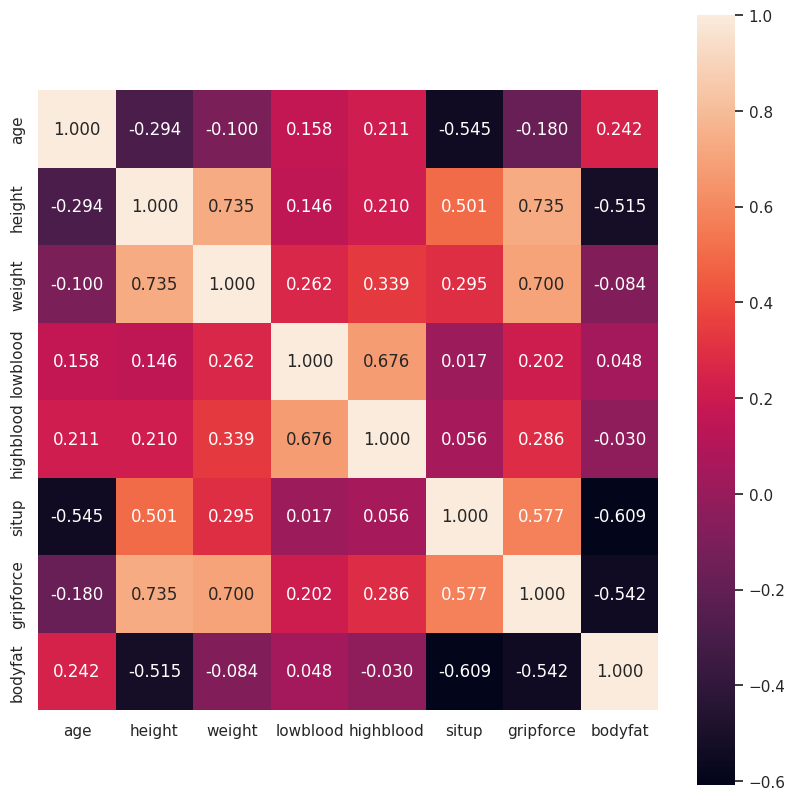

In [ ]:
# Code used to see correlation among features
corr_ = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

## **Regression Model**


1. Single Predictor

In [ ]:
#Reviewing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 13392 non-null  float64
 1   gender              13392 non-null  object 
 2   height              13392 non-null  float64
 3   weight              13392 non-null  float64
 4   lowblood            13392 non-null  float64
 5   highblood           13392 non-null  float64
 6   situp               13392 non-null  float64
 7   gripforce           13392 non-null  float64
 8   bodyfat             13392 non-null  float64
 9   age_category        13392 non-null  object 
 10  gripforce_category  13392 non-null  object 
 11  lowblood_category   13392 non-null  object 
 12  highblood_category  13392 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.4+ MB


In [ ]:
# Drop the columns containing 'category'

columns_to_drop = [col for col in df.columns if 'category' in col]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13392 non-null  float64
 1   gender     13392 non-null  object 
 2   height     13392 non-null  float64
 3   weight     13392 non-null  float64
 4   lowblood   13392 non-null  float64
 5   highblood  13392 non-null  float64
 6   situp      13392 non-null  float64
 7   gripforce  13392 non-null  float64
 8   bodyfat    13392 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [ ]:
# modelling
import statsmodels.formula.api as smf

# statistics
import scipy.stats as stats

def print_coef_std_err(model):
    coef_std_err = pd.DataFrame({'Coefficient': model.params, 'Standard Error': model.bse})
    return coef_std_err

In [ ]:
# Create OLS model object
model = smf.ols("bodyfat ~ gripforce", data=df).fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_data= print_coef_std_err(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5563.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:21   Log-Likelihood:                -43218.
No. Observations:               13392   AIC:                         8.644e+04
Df Residuals:                   13390   BIC:                         8.645e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9172      0.191    193.474      0.0

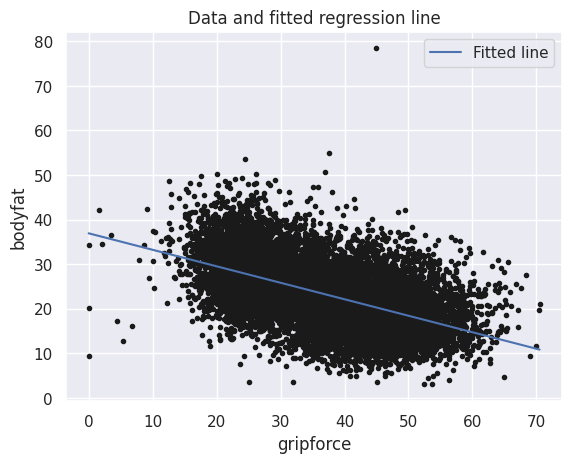

In [ ]:
predictor = "gripforce"
outcome = "bodyfat"
data = df.copy()
results_ = results_data.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_data.loc['Intercept', 'Coefficient']
b_hat = results_data.loc['gripforce', 'Coefficient']

x_domain = np.linspace(np.min(data['gripforce']), np.max(data['gripforce']), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("bodyfat")
plt.xlabel("gripforce")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

Based on the regression analysis results provided, the equation for the relationship between grip force and body fat percentage can be written as:


Body Fat Percentage = 36.9172–0.3700 * Grip Force

This equation represents a linear relationship, where the grip force is multiplied by -0.3700 and then subtracted from the intercept of 36.9172 to estimate the body fat percentage. This equation allows for the prediction of body fat percentage based on an individual's grip force measurement.


The regression analysis results using grip force as a single predictor for body fat percentage reveal an R-squared value of 0.294, indicating that approximately 29.4% of the variation in body fat can be explained by grip force alone. The model's adjusted R-squared value is 0.293, suggesting that the addition of grip force as a predictor slightly improves the model's fit.


The coefficient estimates indicate that the intercept is 36.9172, and the coefficient for grip force is -0.3700. These estimates imply that for each unit increase in grip force, body fat percentage decreases by 0.3700 units. Both the intercept and grip force coefficient are statistically significant, with p-values of 0.000, indicating a strong association between grip force and body fat percentage.


The model's overall statistical significance is supported by a high F-statistic of 5563. The low p-value (0.000) for the F-statistic suggests that the model is significantly better at explaining the variation in body fat compared to a model with no predictors.


In conclusion, the regression analysis demonstrates that grip force is a significant predictor of body fat percentage. The negative coefficient suggests an inverse relationship between grip force and body fat, indicating that higher grip force is associated with lower body fat levels. However, further analysis is needed to evaluate the model's overall goodness of fit and consider potential multicollinearity and non-normality of residuals.

2. Multiple Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

df.head()

,age,gender,height,weight,lowblood,highblood,situp,gripforce,bodyfat
0,27.0,1,172.3,75.24,80.0,130.0,60.0,54.9,21.3
1,25.0,1,165.0,55.80,77.0,126.0,53.0,36.4,15.7
2,31.0,1,179.6,78.00,92.0,152.0,49.0,44.8,20.1
3,32.0,1,174.5,71.10,76.0,147.0,53.0,41.4,18.4
4,28.0,1,173.8,67.70,70.0,127.0,45.0,43.5,17.1


In [ ]:
# Create OLS model object
model = smf.ols("bodyfat ~ age + gender + height + weight + lowblood + highblood + situp + gripforce", data=df).fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_data= print_coef_std_err(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     4266.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:57:19   Log-Likelihood:                -37060.
No. Observations:               13392   AIC:                         7.414e+04
Df Residuals:                   13383   BIC:                         7.421e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.0919      1.142     68.354      0.0

### **Analysis**
Interpretation of Coefficients for Categorical Variables:

Intercept:

The intercept coefficient represents the estimated bodyfat value when all the predictors are zero (reference category for categorical variables).
Coefficient: 78.0919
Interpretation: When all other predictors are zero, the estimated bodyfat value is approximately 78.0919.

Age:

Coefficient: -0.0339
Interpretation: For every one-unit increase in age, the estimated bodyfat value decreases by approximately 0.0339 units, holding all other predictors constant.

Gender:

Coefficient: -5.5072
Interpretation: Males (gender = 1) have an estimated bodyfat value that is approximately 5.5072 units lower than females (gender = 0), holding all other predictors constant.

Height:

Coefficient: -0.4329
Interpretation: For every one-unit increase in height, the estimated bodyfat value decreases by approximately 0.4329 units, holding all other predictors constant.

Weight:

Coefficient: 0.4896
Interpretation: For every one-unit increase in weight, the estimated bodyfat value increases by approximately 0.4896 units, holding all other predictors constant.

Lowblood:

Coefficient: 0.0558
Interpretation: For every one-unit increase in lowblood, the estimated bodyfat value increases by approximately 0.0558 units, holding all other predictors constant.

Highblood:

Coefficient: -0.0092
Interpretation: For every one-unit increase in highblood, the estimated bodyfat value decreases by approximately 0.0092 units, holding all other predictors constant.

Situp:

Coefficient: -0.1427
Interpretation: For every one-unit increase in situp, the estimated bodyfat value decreases by approximately 0.1427 units, holding all other predictors constant.

Gripforce:

Coefficient: -0.2081
Interpretation: For every one-unit increase in gripforce, the estimated bodyfat value decreases by approximately 0.2081 units, holding all other predictors constant.




The regression model is represented by the equation:

***bodyfat = 78.0919 - 0.0339 * age - 5.5072 * gender - 0.4329 * height + 0.4896 * weight + 0.0558 * lowblood - 0.0092 * highblood - 0.1427 * situp - 0.2081 * gripforce ***

This equation shows the relationship between the predictors (age, gender, height, weight, lowblood, highblood, situp, gripforce) and the bodyfat outcome variable. By plugging in the values of the predictors, you can estimate the corresponding bodyfat level.


## **Conclusions**

Based on the comprehensive analysis of the dataset, including exploratory data analysis, statistical tests, and regression models, several conclusions can be drawn regarding the relationship between body fat percentage and the selected parameters: grip force, age, gender, height, weight, blood pressure levels, and sit-ups.


Grip force: The exploratory data analysis and regression model revealed that higher grip force is associated with lower body fat percentage. This indicates that improving grip strength may be beneficial for managing body fat levels.
Age and gender: Both age and gender were found to significantly influence body fat percentage. Older individuals tended to have higher body fat percentages, while females, on average, had higher body fat percentages compared to males. Age and gender should be considered when developing personalized strategies for body fat management.


Anthropometric measurements: Height and weight demonstrated significant associations with body fat percentage. Higher height was linked to lower body fat, while higher weight was associated with higher body fat. Maintaining a healthy weight and considering body composition in relation to height can contribute to optimal body fat levels.


Blood pressure levels: Both low and high blood pressure levels exhibited weak associations with body fat percentage. While the relationship was not substantial, managing blood pressure within a healthy range can contribute to overall health and well-being.


Sit-ups: The number of sit-ups completed was negatively correlated with body fat percentage, indicating that higher abdominal muscle strength and endurance may contribute to lower body fat levels.


Recommendations:
Incorporate grip strength exercises: Since grip strength was strongly associated with lower body fat percentage, including exercises that specifically target grip strength, such as wrist curls and farmer's walks, in fitness routines may be beneficial for managing body composition.


Personalized approach: Recognize the impact of age and gender on body fat percentage and tailor interventions accordingly. Design customized exercise and nutrition plans that account for these factors, considering the unique needs of individuals based on age and gender.


Comprehensive fitness programs: Promote a holistic approach to fitness by combining resistance training, cardiovascular exercise, and core-strengthening activities like sit-ups. These activities can contribute to improved body composition and overall health.


Regular health screenings: Encourage regular blood pressure monitoring and screenings to identify and manage any potential hypertension or hypotension concerns, as blood pressure levels can have an impact on body fat percentage.

## **Further Research**

Investigate additional variables: Explore the potential impact of other variables, such as dietary habits, genetic factors, and lifestyle choices, on body fat percentage. This can provide a more comprehensive understanding of the factors influencing body composition.

Longitudinal studies: Conduct longitudinal studies to assess changes in body fat percentage over time, considering the impact of aging and lifestyle modifications. This can help identify the trajectory of body fat changes and provide insights into effective strategies for long-term body fat management.

Intervention-based studies: Design interventions targeting specific factors identified in this study, such as grip strength, and evaluate their impact on body fat percentage. This can provide evidence-based strategies for improving body composition and informing fitness and health interventions.